In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/content/train_cleaned.csv")
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


In [3]:
#Segregating the features and target variable

x = df.drop(["Item_Outlet_Sales"] , axis = 1)
y = df["Item_Outlet_Sales"]
x.shape , y.shape

((8523, 45), (8523,))

In [5]:
#Splitting the data
from sklearn.model_selection import train_test_split
train_x , test_x , train_y , test_y = train_test_split(x,y,random_state = 50)

In [6]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(6392, 45)
(6392,)
(2131, 45)
(2131,)


In [8]:
#Scaling the data using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [11]:
#Implementing KNN regressor

#Importing KNN regressor and mean_squared_error
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse



In [12]:
#Creating instance of KNN
reg = KNN(n_neighbors = 10 )

#Fitting the model
reg.fit(train_x , train_y)

#Predicting the train set of test and calculating the mean_squared_error
test_predict = reg.predict(test_x)
k = mse(test_predict , test_y)
print('Test MSE:' , k)


Test MSE: 1442133.1473480915


In [20]:
def Elbow(K):
    #Initiating empty list
    test_error = []

    #Training model for every value of k
    for i in K:
        #Instance of k
        reg = KNN(n_neighbors = i)
        reg.fit(train_x , train_y)
        #Appending MSE to the empty list created above
        tmp = reg.predict(test_x)
        tmp = mse(tmp , test_y)
        test_error.append(tmp)
    return test_error

    
        


In [21]:
k = range(2,20)


In [22]:
for i in k:
    print(i)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [23]:
test = Elbow(k)
test

[1747403.5874106062,
 1604761.5069510147,
 1534281.6629848743,
 1499874.446315781,
 1476170.3621236589,
 1447671.10249558,
 1436711.6039666368,
 1448340.3911673964,
 1442133.1473480915,
 1447246.47497128,
 1442405.0000318892,
 1462161.4778319043,
 1462793.5869621327,
 1476453.6467681918,
 1494378.9604147496,
 1516466.4283413861,
 1534455.6596528427,
 1552580.022987115]

In [25]:
#Getting the dataframe for the above calculation

new1 = pd.DataFrame({'k': k , 'Test Error' : test })
new1

,k,Test Error
0,2,1.747404e+06
1,3,1.604762e+06
2,4,1.534282e+06
3,5,1.499874e+06
4,6,1.476170e+06
5,7,1.447671e+06
6,8,1.436712e+06
7,9,1.448340e+06
8,10,1.442133e+06
9,11,1.447246e+06


Plotting the Elbow Curve


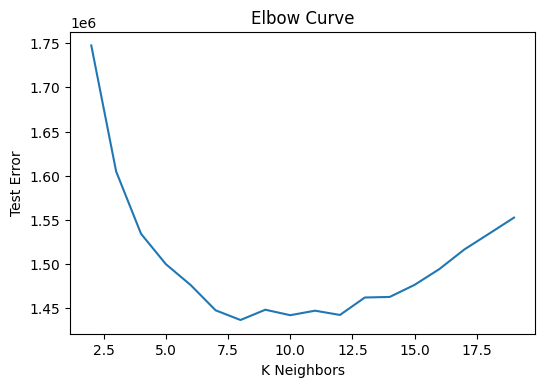

In [29]:
plt.figure(dpi = 100)
plt.plot(k , test)
plt.xlabel("K Neighbors")
plt.ylabel("Test Error")
plt.title("Elbow Curve")
plt.show()